## FES from biased trajectories, too!
<pre> 
Vladas Oleinikovas         uccavol@ucl.ac.uk
Guillermo Pérez-Hernández  guille.perez@fu-berlin.de 
</pre>
We do that by passing correct weights for each conformation in our trajectory. 

We exemplify this with metadynamics trajectory of the ever popular test system - alanine dipeptide. The 2ns simulation used phi and psi angles as CVs, and the corresponding weight was derived using Tiwary and Parrinello reweighting algorithm (JPCB 2014, doi:10.1021/jp504920s).

Try commenting out the weights to notice the effect on the estimated depth of the basins.

In [1]:
import molpx
import numpy as np
%matplotlib notebook

# Topology
top = molpx._molpxdir(join='notebooks/data/ala2.pdb')

# Generated during the metadynamics run (extra reversed copy to have a list of files)
MD_trajfiles = [molpx._molpxdir(join='notebooks/data/ala2.meta.xtc'), 
               molpx._molpxdir(join='notebooks/data/ala2.meta.reversed.xtc')]

# COLVAR files containing CV projections and logarithm of the corresponding weight
colvar_files = [molpx._molpxdir(join='notebooks/data/ala2.meta.CV.txt'), 
                molpx._molpxdir(join='notebooks/data/ala2.meta.CV.reversed.txt')]

# Load logweights and turn them into proper weights
weights = [np.exp(np.loadtxt(ifile)[:,7]) for ifile in colvar_files]

1

13-06-17 15:48:58 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[0] WARNING  Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
13-06-17 15:48:58 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[0] INFO     Presumably finished estimation. Message: Used data for centers: 50.00%


/home/mi/gph82/programs/PyEmma/pyemma/coordinates/clustering/regspace.py:151: UserWarning: Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
  warnings.warn(msg)


(4002, 8) (4002,)


<IPython.core.display.Javascript object>


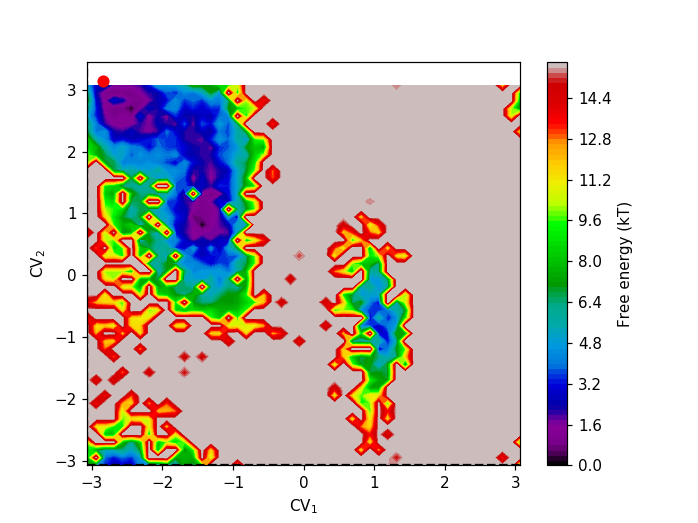

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
ax, fig, iwd, data_sample, geom = molpx.visualize.FES(MD_trajfiles,
                                                      top,
                                                      colvar_files,
                                                      proj_idxs=[1,2],
                                                      nbins=50,
                                                      n_sample=200,
                                                      proj_labels='CV',
                                                      weights=weights, # this is important for biased trajectories!
                                                     )
iwd.center_view()
iwd

## We can also visualize the weights together with the CV-trajectories

<IPython.core.display.Javascript object>


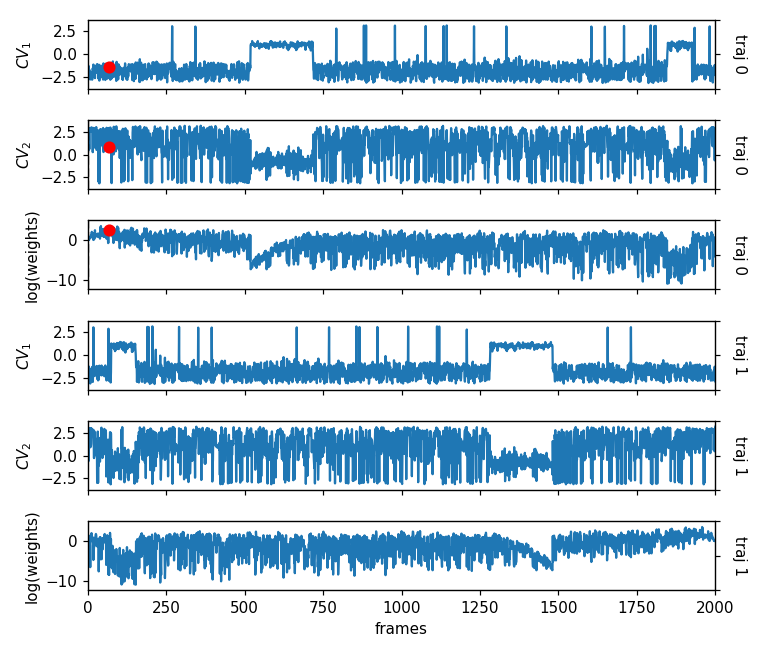

In [15]:
__, myfig, iwd, __ = molpx.visualize.traj(MD_trajfiles,     
                                          top,                                                                                                                              
                                          colvar_files,
                                          max_frames=10000,
                                          proj_idxs=[1, 2, 7],
                                          panel_height=1,    
                                          proj_labels=['$CV_1$','$CV_2$','log(weights)'], 
                          )
myfig.tight_layout()
iwd.center_view()
iwd